In [1]:
import pandas as pd

transactions = pd.read_parquet("transaction_fraud_data.parquet")
currency_rates = pd.read_parquet("historical_currency_exchange.parquet")


In [2]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   transaction_id           object        
 1   customer_id              object        
 2   card_number              int64         
 3   timestamp                datetime64[us]
 4   vendor_category          object        
 5   vendor_type              object        
 6   vendor                   object        
 7   amount                   float64       
 8   currency                 object        
 9   country                  object        
 10  city                     object        
 11  city_size                object        
 12  card_type                object        
 13  is_card_present          bool          
 14  device                   object        
 15  channel                  object        
 16  device_fingerprint       object        
 17  ip_address               ob

In [3]:
print(transactions.isna().sum())


transaction_id             0
customer_id                0
card_number                0
timestamp                  0
vendor_category            0
vendor_type                0
vendor                     0
amount                     0
currency                   0
country                    0
city                       0
city_size                  0
card_type                  0
is_card_present            0
device                     0
channel                    0
device_fingerprint         0
ip_address                 0
is_outside_home_country    0
is_high_risk_vendor        0
is_weekend                 0
last_hour_activity         0
is_fraud                   0
dtype: int64


In [4]:
transactions.head()

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,False,False,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,True,True,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,False,False,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,False,False,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,True,False,False,"{'num_transactions': 218, 'total_amount': 4827...",True


In [5]:
currency_rates.info()
currency_rates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    31 non-null     object 
 1   AUD     31 non-null     float64
 2   BRL     31 non-null     float64
 3   CAD     31 non-null     float64
 4   EUR     31 non-null     float64
 5   GBP     31 non-null     float64
 6   JPY     31 non-null     float64
 7   MXN     31 non-null     float64
 8   NGN     31 non-null     float64
 9   RUB     31 non-null     float64
 10  SGD     31 non-null     float64
 11  USD     31 non-null     int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 3.0+ KB


,date,AUD,BRL,CAD,EUR,GBP,JPY,MXN,NGN,RUB,SGD,USD
0,2024-09-30,1.443654,5.434649,1.351196,0.895591,0.747153,142.573268,19.694724,1668.736400,94.133735,1.280156,1
1,2024-10-01,1.442917,5.444170,1.352168,0.897557,0.746956,143.831429,19.667561,1670.694524,92.898519,1.284352,1
2,2024-10-02,1.449505,5.425444,1.348063,0.903056,0.752241,143.806861,19.606748,1669.653006,94.583198,1.286983,1
3,2024-10-03,1.456279,5.442044,1.351451,0.906018,0.754584,146.916773,19.457701,1670.097873,95.655442,1.294391,1
4,2024-10-04,1.460930,5.477788,1.355260,0.906452,0.761891,146.592323,19.363467,1649.763738,94.755337,1.296800,1


In [6]:
transactions.describe()

,card_number,timestamp,amount
count,7.483766e+06,7483766,7.483766e+06
mean,4.222100e+15,2024-10-15 12:36:38.052469,4.792468e+04
min,3.700086e+14,2024-09-30 00:00:01.034820,1.000000e-02
25%,4.004400e+15,2024-10-07 18:08:27.325326,3.635300e+02
50%,5.010745e+15,2024-10-15 12:46:31.739295,1.177450e+03
75%,5.999914e+15,2024-10-23 07:37:00.969509,2.242953e+04
max,6.999728e+15,2024-10-30 23:59:59.101885,6.253153e+06
std,2.341170e+15,NaN,1.775562e+05


In [7]:
fraud_rate = transactions['is_fraud'].mean()
print(f"Процент мошеннических транзакций: {fraud_rate:.2%}")

category_fraud = (
    transactions.groupby('vendor_category')['is_fraud'].mean()
    .sort_values(ascending=False)
)
category_fraud

Процент мошеннических транзакций: 19.97%


vendor_category
Travel           0.200341
Grocery          0.200194
Gas              0.199731
Restaurant       0.199696
Entertainment    0.199632
Education        0.199459
Retail           0.199398
Healthcare       0.199376
Name: is_fraud, dtype: float64

<Axes: xlabel='hour'>

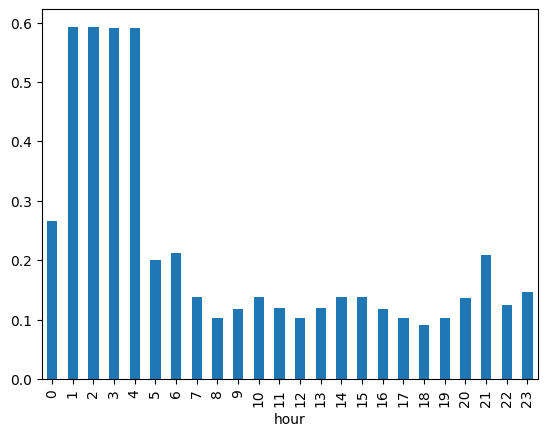

In [8]:
transactions['hour'] = transactions['timestamp'].dt.hour
transactions.groupby('hour')['is_fraud'].mean().plot(kind='bar')


 ТОП-10 стран по уровню мошенничества:


,country,fraud_rate
0,Mexico,0.380348
1,Russia,0.377238
2,Brazil,0.371060
3,Nigeria,0.351360
4,Australia,0.075805
5,USA,0.074615
6,Japan,0.071279
7,Germany,0.070939
8,Canada,0.069988
9,UK,0.069351


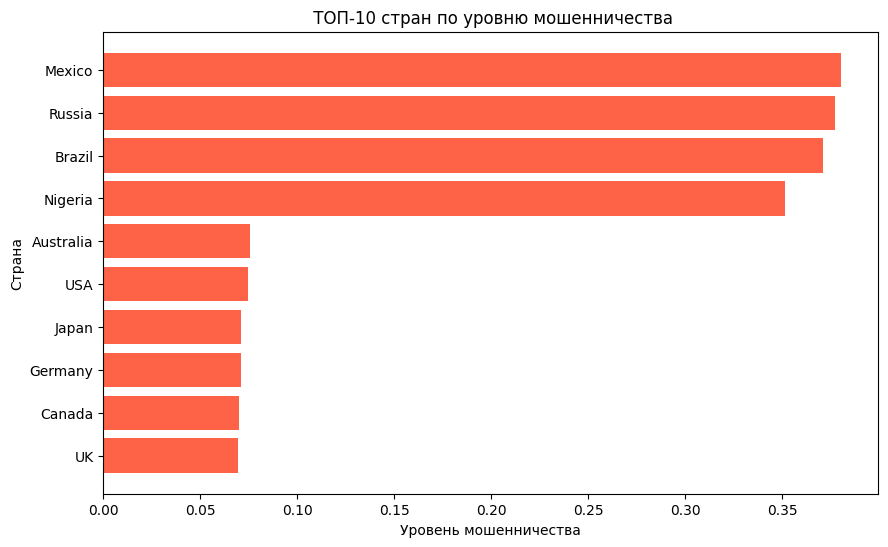


 ТОП-10 городов по уровню мошенничества:


,city,fraud_rate
0,Unknown City,0.208687
1,Los Angeles,0.076191
2,San Jose,0.075517
3,Phoenix,0.075219
4,Philadelphia,0.074909
5,San Diego,0.074784
6,San Antonio,0.074602
7,New York,0.074209
8,Chicago,0.074151
9,Houston,0.073803


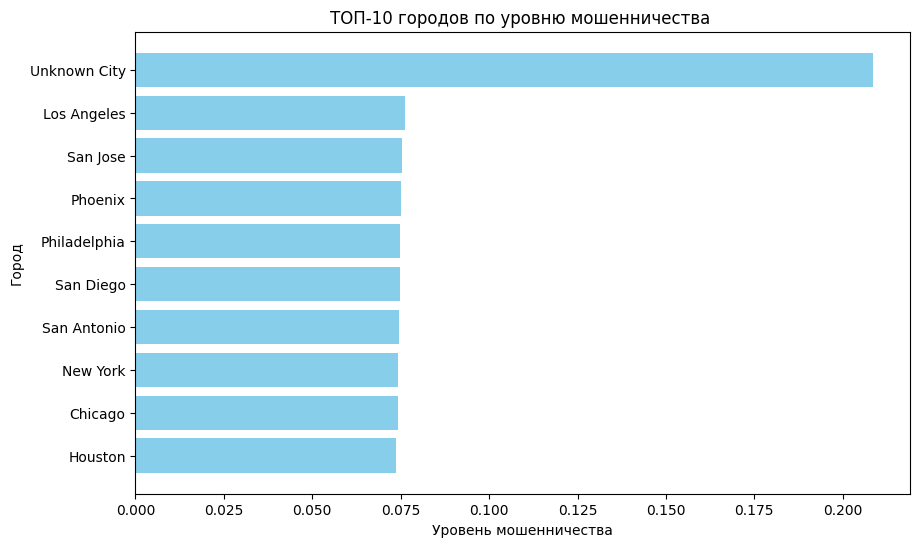


 Влияние фактора 'операция вне страны клиента':


,is_outside_home_country,fraud_rate
0,False,0.024902
1,True,0.567753



ТОП-10 устройств по уровню мошенничества:


,device,fraud_rate
0,Chip Reader,1.000000
1,Magnetic Stripe,1.000000
2,NFC Payment,1.000000
3,Firefox,0.126831
4,Safari,0.126204
5,Android App,0.125070
6,Chrome,0.123710
7,iOS App,0.122703
8,Edge,0.116753



 Частота мошенничества по каналам:


,channel,fraud_rate
0,pos,1.000000
1,mobile,0.123878
2,web,0.123275



 Влияние физического присутствия карты:


,is_card_present,card_type,fraud_rate
0,False,Basic Credit,0.123103
1,False,Basic Debit,0.122954
2,False,Gold Credit,0.124083
3,False,Platinum Credit,0.123485
4,False,Premium Debit,0.123760
5,True,Basic Credit,1.000000
6,True,Basic Debit,1.000000
7,True,Gold Credit,1.000000
8,True,Platinum Credit,1.000000
9,True,Premium Debit,1.000000


In [9]:
import matplotlib.pyplot as plt
fraud_by_country = (
    transactions.groupby('country')['is_fraud']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
fraud_by_country.columns = ['country', 'fraud_rate']

print("\n ТОП-10 стран по уровню мошенничества:")
display(fraud_by_country.head(10))


top_countries = fraud_by_country.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_countries['country'], top_countries['fraud_rate'], color='tomato')
plt.xlabel('Уровень мошенничества')
plt.ylabel('Страна')
plt.title(' ТОП-10 стран по уровню мошенничества')
plt.gca().invert_yaxis() 
plt.show()


city_counts = transactions['city'].value_counts()
valid_cities = city_counts[city_counts > 100].index

fraud_by_city = (
    transactions[transactions['city'].isin(valid_cities)]
    .groupby('city')['is_fraud']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
fraud_by_city.columns = ['city', 'fraud_rate']

print("\n ТОП-10 городов по уровню мошенничества:")
display(fraud_by_city.head(10))


top_cities = fraud_by_city.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_cities['city'], top_cities['fraud_rate'], color='skyblue')
plt.xlabel('Уровень мошенничества')
plt.ylabel('Город')
plt.title('ТОП-10 городов по уровню мошенничества ')
plt.gca().invert_yaxis()
plt.show()






outside_fraud_rate = transactions.groupby('is_outside_home_country')['is_fraud'].mean().reset_index()
outside_fraud_rate.columns = ['is_outside_home_country', 'fraud_rate']

print("\n Влияние фактора 'операция вне страны клиента':")
display(outside_fraud_rate)




fraud_by_device = (
    transactions.groupby('device')['is_fraud']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
fraud_by_device.columns = ['device', 'fraud_rate']

print("\nТОП-10 устройств по уровню мошенничества:")
display(fraud_by_device.head(10))


fraud_by_channel = (
    transactions.groupby('channel')['is_fraud']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
fraud_by_channel.columns = ['channel', 'fraud_rate']

print("\n Частота мошенничества по каналам:")
display(fraud_by_channel)


card_present_fraud = transactions.groupby(['is_card_present', 'card_type'])['is_fraud'].mean().reset_index()
card_present_fraud.columns = ['is_card_present', 'card_type','fraud_rate']

print("\n Влияние физического присутствия карты:")
display(card_present_fraud)

In [ ]:
import numpy as np


#даты к одному формату
transactions['date'] = transactions['timestamp'].dt.date
currency_rates['date'] = pd.to_datetime(currency_rates['date']).dt.date

#  Объединяем по дате, добавляя курсы валют
transactions = transactions.merge(currency_rates, on='date', how='left')

# Конвертация сумм в USD
def convert_to_usd(row):
    currency = row['currency']
    amount = row['amount']
    rate = row[currency] 
    if rate and rate != 0:
        return amount / rate


transactions['amount_usd'] = transactions.apply(convert_to_usd, axis=1)
transactions['amount_usd'].isna().sum()

print(transactions[['amount', 'currency', 'amount_usd']].head())


mean_amounts = transactions.groupby('is_fraud')['amount_usd'].mean().reset_index()
mean_amounts.columns = ['is_fraud', 'mean_amount_usd']
print(" Средняя сумма транзакции по классам:")
display(mean_amounts)



C:\Users\Marsohodik\AppData\Local\Temp\ipykernel_9980\3094459907.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_bin = transactions.groupby('amount_bin')['is_fraud'].mean().reset_index()


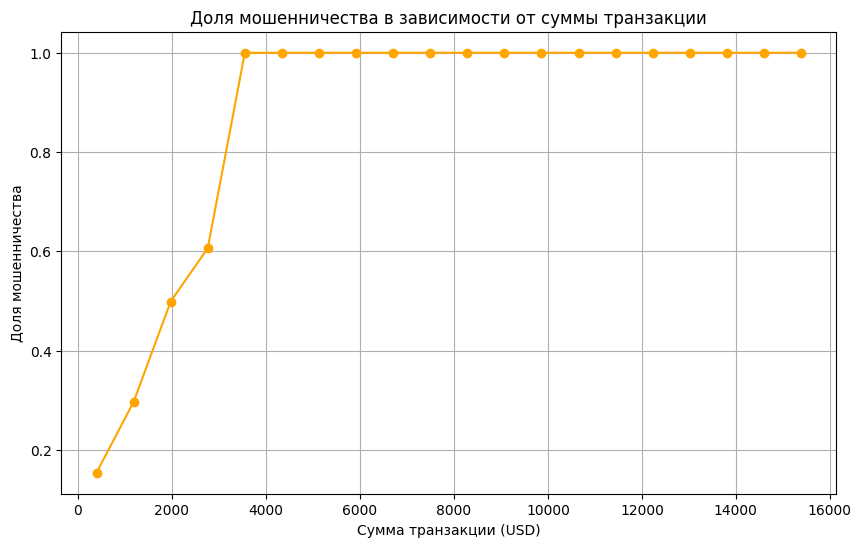

In [ ]:

num_bins = 20
min_amount = transactions['amount_usd'].min()
max_amount = transactions['amount_usd'].max()


bins = np.linspace(min_amount, max_amount, num_bins + 1)


transactions['amount_bin'] = pd.cut(transactions['amount_usd'], bins=bins, include_lowest=True)

fraud_by_bin = transactions.groupby('amount_bin')['is_fraud'].mean().reset_index()

fraud_by_bin['bin_center'] = fraud_by_bin['amount_bin'].apply(lambda x: x.left + (x.right - x.left)/2)


plt.figure(figsize=(10,6))
plt.plot(fraud_by_bin['bin_center'], fraud_by_bin['is_fraud'], marker='o', color='orange')
plt.xlabel('Сумма транзакции (USD)')
plt.ylabel('Доля мошенничества')
plt.title('Доля мошенничества в зависимости от суммы транзакции')
plt.grid(True)
plt.show()
